<a href="https://colab.research.google.com/github/IngridSchieven/NaarDeHaaien1705/blob/main/Shark_Attack_assignment_Ingrid_170522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [57]:
#read in the CVS file attacks.csv
#many thanks to Stefanie for sharing her Github repository

url = 'https://raw.githubusercontent.com/stefaniemichielsen/Winc/main/attacks.csv'
df = pd.read_csv(url, encoding='cp1252')

df.head(10) #quick scan of df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [58]:
# Explore the dataset!

#df.shape         #25723 rows, 24 columns
#df.size          #617352 cells
#df.columns       #NB: some weird columnnames appear already
#df.head()
#df.tail()        #NB: only NaN's appear!!
#df.info()        #gives valuable information
#df.describe()

# note: I'm always printing out df.info(), gives me a good overview what to do to clean up the df

In [ ]:
df.sample(1)

In [ ]:
#Quick overview of missing data use these features:

for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [61]:
#Clean up the dataset
#drop multiple columns that are irrelevant
df1 = df.drop(columns=['Year', 'Investigator or Source', 'pdf','Time', 'Area', 'Location', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Injury',
       'Unnamed: 23'])

#rename columns 
df2 = df1.rename(columns= {'Case Number': 'Case_Number', 'Type': 'Attack_Type', 'Name': 'Victim_Name', 'Fatal (Y/N)': 'Fatal', 'Species ': 'Shark_Type', 'Sex ': 'Sex'})

#set_index to set a useful index > not necessary??

In [62]:
df2.sample(5)
df2.columns

Index(['Case_Number', 'Date', 'Attack_Type', 'Country', 'Activity',
       'Victim_Name', 'Sex', 'Age', 'Fatal', 'Shark_Type'],
      dtype='object')

In [63]:
#Looking for missing data

#A. look at al the unique values (per column?)
#B. sorting and looking at the edges
#C. casting to a type
#D. looking at the freq.

#after that:

# Decide what to do with the default Null values and replace in for example: NaN, None, NaT, Unknown, False etc.
# Replace missing values with tactics as dropna, fill_values etc.

In [64]:
#A. B. C. D. 
#I'm using the tactics out of the missing data lesson of Winc Academy

def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

#A - LOOKING AT UNIQUE VALUES
def look_at_unique_values(column): 
  unique_values_cutoff = 50
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

#B - LOOK AT EDGES AND SORT
def look_at_edges(df2, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df2[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df2.loc[~df2[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

#C - CAST TO TYPE
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df2, column_name, maybe_type):
  long_separator_amount = 75
  short_separator_amount = 35

  print_separator('*', long_separator_amount, f'Finding non default missing values for column \'{column_name}\'')
  print(f'Column \'{column_name}\'has datatype: {df2.dtypes[column_name]}')
  column = df2[column_name]

# A - LOOK AT UNIQUE VALUES PER COLUMN
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

# B - SORTING AND LOOKING AT EDGES
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df2, column_name)

# C - CASTING TO A TYPE
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

# D - LOOKING AT THE FREQUENTIE
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False)) #this is the code, no function needed

  print("\n") #just printing a new line

# df2.head()

In [65]:
#further exploration of the df
display(list(df2.columns))

['Case_Number',
 'Date',
 'Attack_Type',
 'Country',
 'Activity',
 'Victim_Name',
 'Sex',
 'Age',
 'Fatal',
 'Shark_Type']

In [66]:
#Check if the code worked out fine! > it does!
#find_non_default_missing_values(df2, 'Date', 'datetime64')
#find_non_default_missing_values(df2, "Country", "str") 

In [67]:
# Decide for every column what to do with the default Null values and replace 
# in for example: NaN, None, NaT, Unknown, False etc.

#using this function:
from dataclasses import replace
def replace_value(df2, column_name, missing_old, missing_new):
  # ⚠️ Mutates df
  df2[column_name] = df2[column_name].replace({missing_old: missing_new})

#and helper functions:
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")

# ✅ Case_Number
#find_non_default_missing_values(df2, 'Case_Number','string')
#action > replace '0' into None
replace_value(df2, 'Case_Number', '0', None)
replace_value(df2, 'Case_Number', 'NaN', None)
#find_non_default_missing_values(df2, 'Case_Number','string') #rerun to check result

# ✅ Date
#find_non_default_missing_values(df2, 'Date','datetime64')
#action > replace Nan's into NaT
replace_value(df2, 'Date', np.nan, np.datetime64('nat'))
#find_non_default_missing_values(df2, 'Date','datetime64') #rerun to check result

# ✅ Attack_Type
#find_non_default_missing_values(df2, 'Attack_Type','str') 
#action > replace Boat and Boatomg to Boating > replace Invalid to None
replace_value(df2, 'Attack_Type', 'Boat', 'Boating')
replace_value(df2, 'Attack_Type', 'Boatomg', 'Boating')
replace_value(df2, 'Attack_Type', 'Invalid', None)
replace_value(df2, 'Attack_Type', np.nan, None)
#find_non_default_missing_values(df2, 'Attack_Type','str')  #rerun to check result

# ✅ Country
#find_non_default_missing_values(df2, 'Country','str')
#no action needed

# ✅ Area
#find_non_default_missing_values(df2, 'Area','str')
#no action needed

# ✅ Location
#find_non_default_missing_values(df2, 'Location', 'str')
#no action needed

# ✅ Activity
#find_non_default_missing_values(df2, 'Activity', 'str')
#action > replace NaN's into 'Unknown'
replace_value(df2, 'Activity', np.nan, None)
replace_value(df2, 'Activity', 'Swimming ', 'Swimming')
#find_non_default_missing_values(df2, 'Activity', 'str') #rerun to check result

# ✅ Victim_Name
#find_non_default_missing_values(df2, 'Victim_Name',"str")
replace_value(df2, 'Victim_Name', np.nan, None)
#find_non_default_missing_values(df2, 'Victim_Name', 'str') #rerun to check result
# ⚠️ Interesting: values in this column Female, Male, Boy can 
#     be useful in column 'Sex ' to fill missing values there!!!

# ✅ Sex
#find_non_default_missing_values(df2, 'Sex','bool')
#df2.Sex.unique()
replace_value(df2, 'Sex', 'M ', 'M')
replace_value(df2, 'Sex', '.', np.nan)
replace_value(df2, 'Sex', 'N', np.nan)
replace_value(df2, 'Sex', 'lli', np.nan)
replace_value(df2, 'Sex', 'Unknown', np.nan)
#find_non_default_missing_values(df2, 'Sex','bool')

# ✅ Age
#find_non_default_missing_values(df2, 'Age', 'int')
#puinhoop column - veel acties - zie ook liveles DA Simon
#check df.Age.value_counts()
#check df.Age.value_counts()['Teens'] etc. frequentie te laag om df aan te passen.
#Keuze gemaakt om alle str values omzetten naar NaN's middels volgende functie:
def cleanup_age(value):
  try:
    return int(value)
  except:
    return np.nan

#df.Age = df.Age.apply(cleanup_age)
#testing def
#cleanup_age('Teen')
#cleanup_age('11') 
#df.Age.unique()
#find_non_default_missing_values(df2, 'Age', 'int')

# ✅ Injury
#find_non_default_missing_values(df2, 'Injury', 'str')
# ⚠️ Interesting: Provoked in string, search in fillin column Attack_Type???
# ⚠️ Interesting: FATAL in string, search in fillin column FATAL(Y/N)???
#choose to don't clean up this columns at the moment!

# ✅ Fatal
#find_non_default_missing_values(df2, 'Fatal','bool')   #toodoooo clean up
replace_value(df2, 'Fatal', ' N', 'N')
replace_value(df2, 'Fatal', 'N ', 'N')
replace_value(df2, 'Fatal', 'y', 'Y')
replace_value(df2, 'Fatal', 'M', 'N') #assume it's a typo
replace_value(df2, 'Fatal', '2017', np.nan)
#find_non_default_missing_values(df2, 'Fatal','bool')

# ✅ Time
#find_non_default_missing_values(df2, 'Time','datetime64')
#No action needed at this moment, maybe in future analyse questions

# ✅ Shark_Type
#find_non_default_missing_values(df2, 'Shark_Type', 'str')
replace_value(df2, 'Shark_Type', 'Invalid', None)
replace_value(df2, 'Shark_Type', np.nan, None)
replace_value(df2, 'Shark_Type', 'Shark involvement not confirmed', None)
replace_value(df2, 'Shark_Type', 'Shark involvement prior to death was not confirmed', None)
replace_value(df2, 'Shark_Type', 'Shark involvement prior to death unconfirmed', None)
replace_value(df2, 'Shark_Type', '\xa0', None)
replace_value(df2, 'Shark_Type', '', None)
replace_value(df2, 'Shark_Type', 'Unidentified shark', None)
#find_non_default_missing_values(df2, 'Shark_Type', 'str')



***************************************************************************
Finding non default missing values for column 'Shark_Type'
***************************************************************************
Column 'Shark_Type'has datatype: object


-----------------------------------
A: Looking at unique values
-----------------------------------
More than 50 unique values (total: 1545)


-----------------------------------
B: Sorting and looking at the edges
-----------------------------------
Could not sort values: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " 6' to 8' shark",
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ",
 ' Bull shark, 1.2m ',
 ' Bull shark, 2.5 m',
 " Bull shark, 5'",
 " Bull shark, 8'",
 " Galapagos shark, 6'"]

['small hammerhead shark',
 'small nurse shark',
 'small shark',
 'small sharks',
 "small sharks'",
 'unknown, possibly a white shark',
 'whaler shark',
 'white shark',
 '\xa0 ',
 '“small brown shark”']



-----------------------------------
C: Casting to type: str
-----------------------------------
Casting to str was successful


-----------------------------------
D: Looking at frequency
-----------------------------------


NaN                                                                                                                              22623
White shark                                                                                                                        163
Tiger shark                                                                                                                         73
Bull shark                                                                                                                          52
4' shark                                                                                                                            40
                                                                                                                                 ...  
Bull shark, 2.3 m [7.5']                                                                                                             1
0.9 m  [3'] shark                                      

In [68]:
# after that:
# Replace missing values with tactics as dropna, fill_values etc.

#Just a little test:
percent_missing = df2.isnull().mean() * 100
display(percent_missing)

#first I want to get rid of all rows with only NaN's!
df3 = df2.dropna(how='all')

#At the moment I decide not to do more actions, just to avoid BIAS's

Case_Number    75.500525
Date           75.500525
Attack_Type    77.642577
Country        75.694903
Activity       77.615364
Victim_Name    76.316915
Sex            77.712553
Age            86.506240
Fatal          77.599813
Shark_Type     87.948529
dtype: float64

In [69]:
df3.shape

(6303, 10)

In [ ]:
#repareren Age kolom 
#casten naar int lukt niet
#mbv fillna NaN's omgezet naar Unknown, lijkt floats om te zetten naar int...
#df3.Age()
values = {'Age': 'Unknown'}
df4 = df3.fillna(value=values)
#df4.info()
df4.sample(5)

White shark              163
Tiger shark               73
Bull shark                52
4' shark                  40
6' shark                  40
Questionable incident     35
1.8 m [6'] shark          35
Questionable              34
1.5 m [5'] shark          32
1.2 m [4'] shark          27
3' shark                  26
5' shark                  26
2 m shark                 25
4' to 5' shark            24
3 m [10'] shark           22
Name: Shark_Type, dtype: int64



The most dangerous shark to humans is the 0    White shark
Name: Shark_Type, dtype: object!




Text(0, 0.5, 'Number of Attacks')

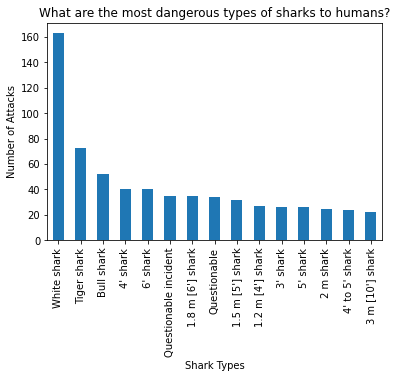

In [71]:
#QUESTION 1. WHAT ARE THE MOST DANGEROUS TYPES OF SHARKS TO HUMANS?

#to answer this question we need to count the values in column Shark_Type 
#and be aware of different string values like White, white, shark, Sharks etc.

display(df4.Shark_Type.value_counts().head(15)) #gives indication that the White shark attacks the most. 
#try to check this out!

#trying a nice way to showing the answer of Q1
print("\n")
print(f"The most dangerous shark to humans is the {df4.loc[:0, 'Shark_Type']}!")  #almost getting there... ;-)
print("\n")

#ANSWER: White sharks are the most dangerous types of sharks to humans!

df4.Shark_Type.value_counts().head(15).plot(kind='bar')
plt.title('What are the most dangerous types of sharks to humans?')
plt.xlabel('Shark Types')
plt.ylabel('Number of Attacks')

In [72]:
#Q1 - Keep on filtering and testing

#selecting out the rows in column Shark_Type with strings that contain shark/sharks
df_question1 = df4.loc[df4.Shark_Type.str.contains('shark|sharks', na=False)]

#more White Sharks are coming out selecting on selecting: white/White
df_question1_2 = df_question1.loc[df_question1.Shark_Type.str.contains('white |White ', na=False)]

#explore new df
#df_question1_2.info()
#df_question1_2.describe()

#hoeveel witte haaien tel ik na 'doorfiltering'?
print("\n")
print('The real number of White Shark attacks is:')
print(df_question1_2.Shark_Type.count())

print("\n")





The real number of White Shark attacks is:
635




In [73]:
#QUESTION 2. ARE CHILDREN MORE LIKELY TO BE ATTACKED BY SHARKS?

#to find the answer I would like to make a scatterchart to view the relationship between ages and attacks
#first some sorting things
df_question2_ages = df4.Age.value_counts().head(30).sort_values(ascending=False)
df_question2 = df_question2_ages.to_frame()
#df_question2_ages
#display(df_question2)

#try to remove second row Unknown 22252
#rename columns
df2_question2 = df_question2.rename(columns={'Age': 'Attack_per_Age'})
df2_question2 = df2_question2.drop(df2_question2.index[0])

df2_question2['Age'] = df2_question2.index

df2_question2.head(15)

#changing dtype column Ages from str into int
df2_question2 = df2_question2.astype({'Age': int})
df2_question2.dtypes

Attack_per_Age    int64
Age               int64
dtype: object

In [74]:
#filtering < 18
SharkAttacks_Children = df2_question2.loc[df2_question2.Age < 18, ['Age', 'Attack_per_Age']]
print("\n")
print("The total number of shark attack < 18 years appears to be: ")
print(SharkAttacks_Children.Attack_per_Age.sum())
print("\n")



The total number of shark attack < 18 years appears to be: 
755




In [75]:
#filtering >= 18
SharkAttacks_Addults = df2_question2.loc[df2_question2.Age >= 18, ['Age', 'Attack_per_Age']]
print("\n")
print("The total number of shark attack >= 18 years appears to be: ")
print(SharkAttacks_Addults.Attack_per_Age.sum())
print("\n")



The total number of shark attack >= 18 years appears to be: 
1832




In [76]:
#doe some plotting
#SharkAttacks_Children.plot.scatter(x='Age', y='Attack_per_Age')
#SharkAttacks_Addults.plot.scatter(x='Age', y='Attack_per_Age')

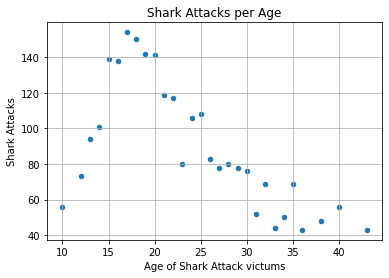

In [77]:
#Q2 - PLOT

#df2_question2.head(25).plot.scatter(y='Attack_per_Age', x='Age')
#df2_question2.head(15).plot.pie(y='Attack_per_Age', x='Age')
#df2_question2.head(35).plot.scatter(x= 'Age', y='Attack_per_Age')
df2_question2.plot.scatter(y='Attack_per_Age', x='Age')

plt.title('Shark Attacks per Age')
plt.xlabel('Age of Shark Attack victums')
plt.ylabel('Shark Attacks', rotation=90)
plt.grid() 


In [78]:
#Q2 - Answer
# According to the total number of shark attacks 
# it appears that children (<18) are NOT more likely to be attacked by sharks!
# Take a look at the plot above to see the results!
# But keep in mind that addults are more surfing, fishing and so on...

In [79]:
#QUESTION 3 - ARE SHARKS ATTACKS WHERE SHARKS WERE PROVOKED MORE OF LESS DANGEROUS?
#goal: to make a barchart with these 4 values in it. #plot.bar(stacked=True)?
#start to make a df with the columns Attack_Type and Fatal!
df5 = df3.loc[:, ['Attack_Type','Fatal']]
df5.head(10)

,Attack_Type,Fatal
0,Boating,N
1,Unprovoked,N
2,None,N
3,Unprovoked,N
4,Provoked,N
5,Unprovoked,N
6,Unprovoked,Y
7,Unprovoked,N
8,Unprovoked,N
9,Unprovoked,N


In [80]:
#Q3 - selecting the rows with Unprovoked/Provoked en Y/N in the columns Attack_Type and Fatal
df_q3_Attack_Type = df5.loc[df5.Attack_Type.str.contains('Unprovoked|Provoked', na=False)]
df_q3_Attack_Type.sample(5)

,Attack_Type,Fatal
1386,Unprovoked,N
2094,Unprovoked,N
4529,Unprovoked,Y
500,Unprovoked,Y
1007,Unprovoked,N


In [81]:
#Q3 - counting Unprovoked/Provoked and Fatal Y/N
df_q3_Attack_Type.value_counts()
#results:

Attack_Type  Fatal  
Unprovoked   N          3351
             Y          1181
Provoked     N           549
Unprovoked   UNKNOWN      57
Provoked     Y            19
             UNKNOWN       3
dtype: int64

In [82]:
#testing (normalize=True) > gives me the percentages!!!
#bewaren om nog eens terug te kijken
df28 = df_q3_Attack_Type.value_counts(normalize=True)
df28

Attack_Type  Fatal  
Unprovoked   N          0.649419
             Y          0.228876
Provoked     N          0.106395
Unprovoked   UNKNOWN    0.011047
Provoked     Y          0.003682
             UNKNOWN    0.000581
dtype: float64

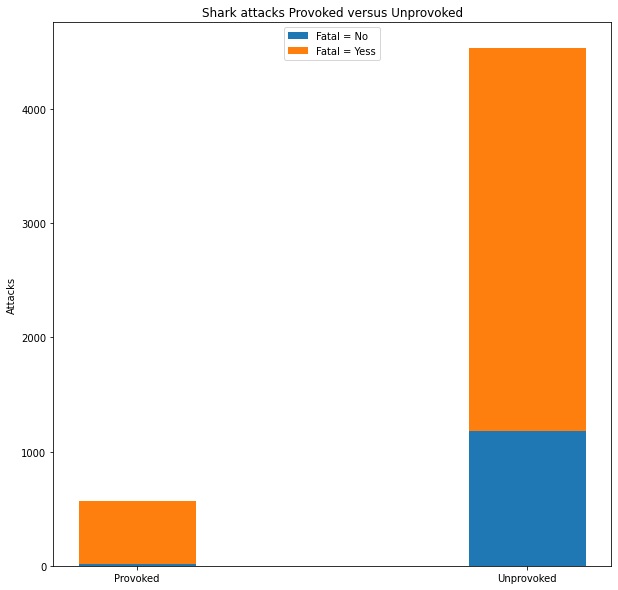

In [84]:
#Q3 - Plotting
#example via matplotlib.org website bar_stacked
import matplotlib.pyplot as plt

labels = ['Provoked', 'Unprovoked']
fatal_y = [19, 1181]
fatal_n = [549, 3351]
width = 0.30       

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, fatal_y, width, label='Fatal = No')
ax.bar(labels, fatal_n, width, bottom=fatal_y,
       label='Fatal = Yess')

ax.set_ylabel('Attacks')
ax.set_title('Shark attacks Provoked versus Unprovoked')
ax.legend(loc='upper center')
plt.show()

In [ ]:
#Q3 - Extra plot: try to calculate some percentages, didnot work out. Calculations by hand.
#bewaren om nog eens terug te kijken!!
# 1. Fatal attacks Y / Unprovoked Fatal attacks  * 100
# 2. Fatal attacks Y / Provoked Fatal attacks * 100
# 3. Fatal attacks N / Unprovoked Fatal attacks  * 100
# 4. Fatal attacks N / Provoked Fatal attacks * 100

#Q3 - Plotting
#example via matplotlib.org website bar_stacked
#import matplotlib.pyplot as plt

#labels = ['Provoked', 'Unprovoked']
#fatal_y = [3.3, 26.06]
#fatal_n = [97.7, 73.94]
#width = 0.25       

#fig, ax = plt.subplots(figsize=(10,10))

#ax.bar(labels, fatal_y, width, label='% Fatal = No')
#ax.bar(labels, fatal_n, width, bottom=fatal_y)
#ax.set_ylabel('Attacks')
#ax.set_title('% Shark attacks Provoked versus Unprovoked')
#ax.legend(loc='upper center')
#plt.show()

In [115]:
# Q3 - Answer
print("\n")
print('Q3 Answer: Provoked Shark attacks are less dangerous then the Unprovoked!')
print("\n")



Q3 Answer: Provoked Shark attacks are less dangerous then the Unprovoked!




In [97]:
#QUESTION 4: Are certain activities more likely to result in a shark attack?
#quick answer: Certain activities are certainly more likely to result in a shark attack!
#Surfing, Swimming and Fishing are not recommanded ;-)

#but of course we will make the answer visual in a plot... 

#df3.loc['Activity'].value_counts().head(10)
#df_q4 = df3.loc[:, ['Activity']].value_counts().head(15)
#df_q4_2 = df_q4.to_frame() # make a df of it
#df_q4_2.head(15)

df_activities = pd.DataFrame(df3.loc[:,'Activity'].value_counts().head(15))  #use pd.DataFrame!!!
df_activities_1 = df_activities.reset_index()                                # reset index!!!
df_activities_2 = df_activities_1.rename(columns = {'index': 'Activity','Activity': 'Frequency'} ) #renamen én opslaan!!!
df_activities_2.head(10)

,Activity,Frequency
0,Surfing,971
1,Swimming,916
2,Fishing,431
3,Spearfishing,333
4,Bathing,162
5,Wading,149
6,Diving,127
7,Standing,99
8,Snorkeling,89
9,Scuba diving,76


In [ ]:
#Q4 #bewaren om later nog eens terug te kijken
#kolomnaam 0 aanpassen (nb: tip rename opslaan! David, dank!)
#df_q4_2 = df_q4_2.rename(columns={0: 'Attack_Nrs'})
#dtype aanpassen naar int
#df_q4_2 = df_q4_2.astype({'Attack_Nrs': int})
#df_q4_2.head(15)

In [ ]:
#trie to add a column to make free the index
#bewaren om later nog eens terug te kijken
#df_q4_2['Act'] = df_q4_2['Activity']
#df_q4_2.assign(Activities=df_q4_2.Activity)
#df_q4_2=df_q4_2.reset_index(drop=True)
#df_q4_2['Act'] = df_q4_2['Activity']
#df_q4_2.head(5)

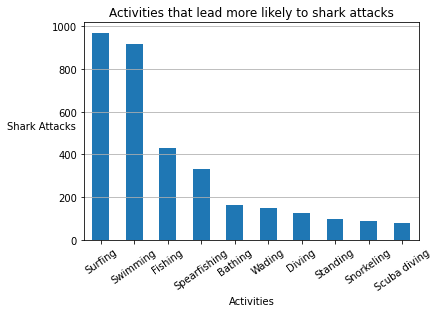

In [109]:
#Q4 - plot 
df_activities_2.head(10).plot.bar(x='Activity', y='Frequency', legend=None)
plt.title('Activities that lead more likely to shark attacks')
plt.xlabel('Activities')
plt.ylabel('Shark Attacks', rotation=0)
plt.grid(axis='y')
plt.xticks(rotation=35)
plt.show()

In [114]:
#Q4 Answer:
print('Q4 Answer:')
print("\n")
print('Surfing, Swimming and Fishing are not recommanded ;-)')
print("\n")

Q4 Answer:


Surfing, Swimming and Fishing are not recommanded ;-)


